<h1><strong><u>K-Nearest Neighbors Model</u></strong></h1>

<h2><strong><u>Data Preparation</u></strong></h2>

In [1]:
%%capture
%run DataPrep.ipynb

<h2><strong><u>KNN Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

In [2]:
pipeline = Pipeline(
    [
        ("clf", KNeighborsClassifier())
    ]
)
neighbors = list(range(1, 151, 10))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__n_neighbors",
                                                   param_range=neighbors,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

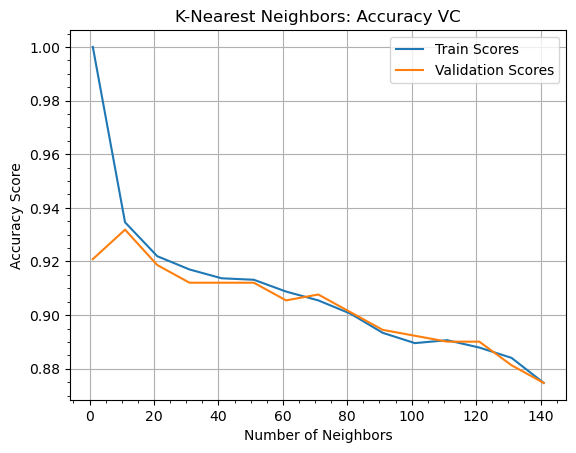

In [3]:
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neighbors")
plt.title("K-Nearest Neighbors: Accuracy VC")
plt.plot(neighbors, train_scores_mean, label="Train Scores")
plt.plot(neighbors, validation_scores_mean, label="Validation Scores")
plt.grid()
plt.minorticks_on()
plt.legend()

<h3><strong><u>Cross Validation Testing</u></strong></h3>

# Find optimal range

In [4]:
pipeline = Pipeline(
    [
        ("clf", KNeighborsClassifier())
    ]
)
param_grid = {
    "clf__n_neighbors": [7, 10, 14, 17, 20],
}

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train)
knn_classifier = model.best_estimator_
print(model.best_params_)

def knn_bc_classifier():
    return knn_classifier

{'clf__n_neighbors': 10}


<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
Just based off the results from the validation curve, I can see that best that this model can score on the test data is around 93-94%. I don't believe that this model will do any better than the Logistic Regression model.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curves</u></strong></h3>

In [5]:
for key, value in clf_metrics.items():
    knn_train_sizes, knn_train_scores, knn_validation_scores = learning_curve(
        knn_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    knn_train_scores_mean = np.mean(knn_train_scores, axis=1)
    knn_train_scores_std = np.std(knn_train_scores, axis=1)
    knn_validation_scores_mean = np.mean(knn_validation_scores, axis=1)
    knn_validation_scores_std = np.std(knn_validation_scores, axis=1)

    # Calculate spread of data around the mean
    knn_train_range_minus = knn_train_scores_mean - knn_train_scores_std
    knn_train_range_plus = knn_train_scores_mean + knn_train_scores_std
    knn_validation_range_minus = knn_validation_scores_mean - knn_validation_scores_std
    knn_validation_range_plus = knn_validation_scores_mean + knn_validation_scores_std

    lc_dict[key] = [[knn_train_scores_mean, knn_validation_scores_mean],
                    [knn_train_range_minus, knn_train_range_plus], 
                    [knn_validation_range_minus, knn_validation_range_plus], 
                    knn_train_sizes]

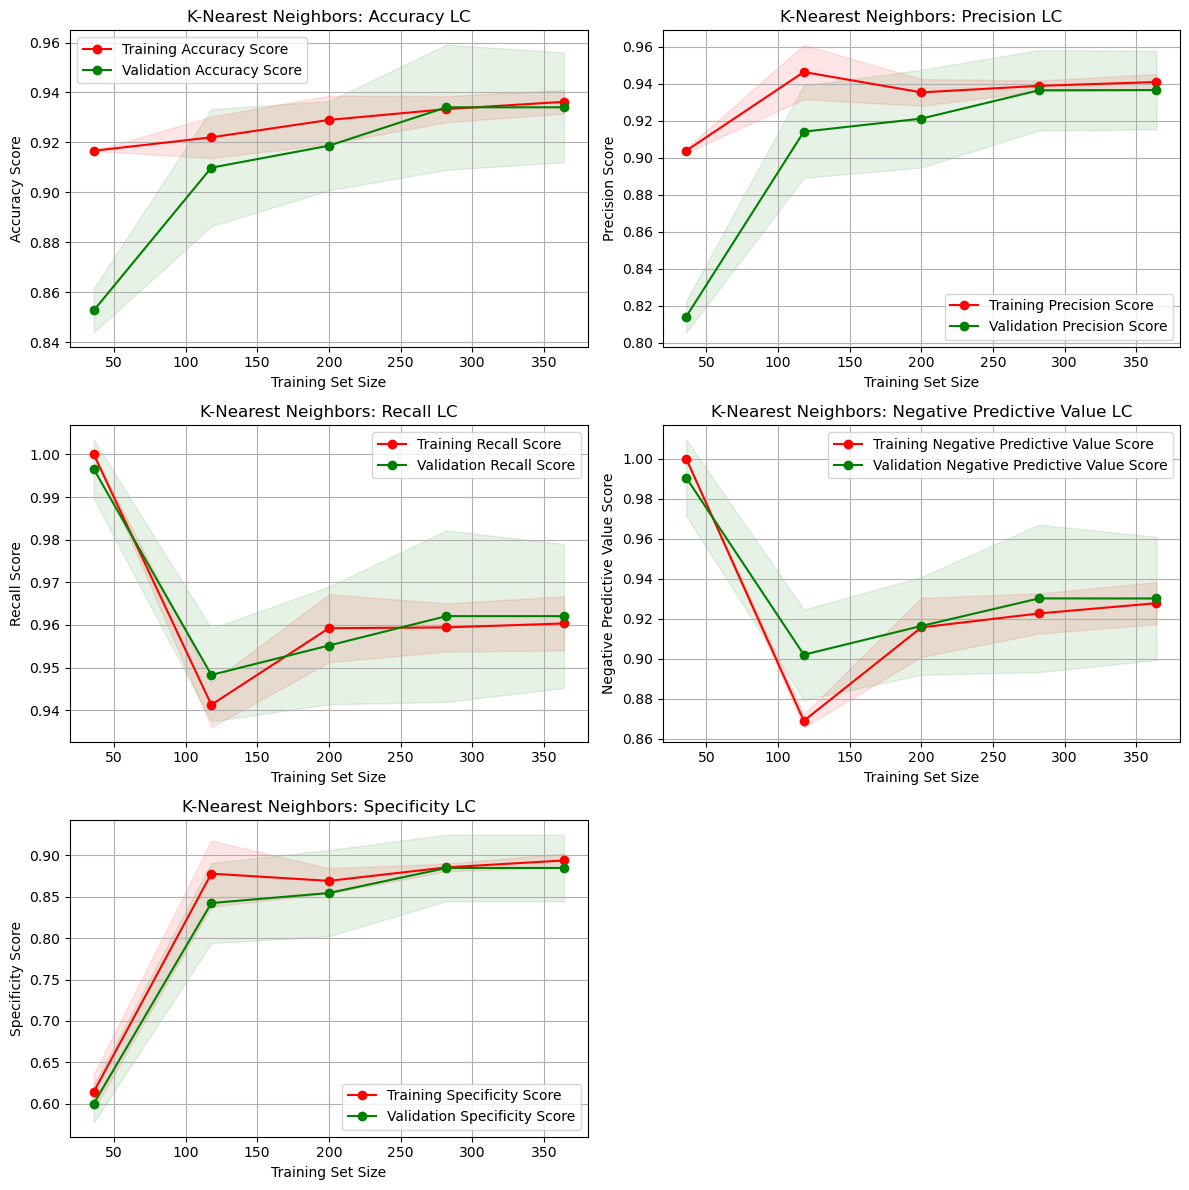

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in lc_dict.items():
    axs[count].set_title(f"K-Nearest Neighbors: {key} LC")
    axs[count].set_xlabel("Training Set Size")
    axs[count].set_ylabel(f"{key} Score")
    axs[count].grid()

    axs[count].fill_between(value[3], value[1][0], value[1][1], alpha=0.1, color="r")
    axs[count].fill_between(value[3], value[2][0], value[2][1], alpha=0.1, color="g")
    axs[count].plot(value[3], value[0][0], 'o-', color="r", label=f"Training {key} Score")
    axs[count].plot(value[3], value[0][1], 'o-', color="g", label=f"Validation {key} Score")
    axs[count].legend()
    count += 1
    
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [7]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(knn_classifier, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.96703297 0.9010989  0.93406593 0.92307692 0.94505495]
Training Average and Standard Error:  0.93% ± 2.20% 

Precision
CV Training Scores:  [0.96610169 0.90163934 0.94827586 0.93220339 0.93442623]
Training Average and Standard Error:  0.94% ± 2.12% 

Recall
CV Training Scores:  [0.98275862 0.94827586 0.94827586 0.94827586 0.98275862]
Training Average and Standard Error:  0.96% ± 1.69% 

Negative Predictive Value
CV Training Scores:  [0.96875    0.9        0.90909091 0.90625    0.96666667]
Training Average and Standard Error:  0.93% ± 3.08% 

Specificity
CV Training Scores:  [0.93939394 0.81818182 0.90909091 0.87878788 0.87878788]
Training Average and Standard Error:  0.88% ± 4.02% 



Text(0.5, 1.0, 'K-Nearest Neighbors: Confusion Matrix (Evaluation)')

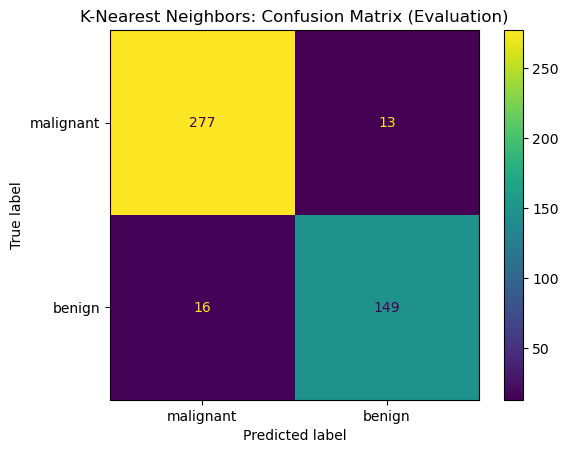

In [9]:
#Training Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(knn_classifier, X_train, y_train, labels=['malignant', 'benign'])
disp.ax_.set_title("K-Nearest Neighbors: Confusion Matrix (Evaluation)")

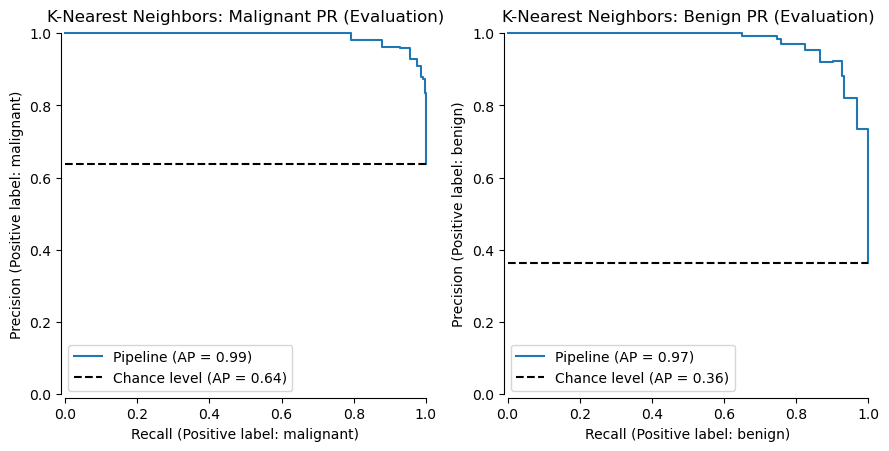

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs = axs.flatten()
count = 0
for label in train_labels:
    disp = PrecisionRecallDisplay.from_estimator(knn_classifier, X_train, y_train, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"K-Nearest Neighbors: {label.title()} PR (Evaluation)")
    count += 1

plt.tight_layout()  
plt.show()

# EDIT THIS

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of my selected model, I found positive results for all evaluation methods. The learning curves yielded good results and the 'cross_val_score' function evaluation results reinforced the learning curve values. In addition, the Confusion Matrix helps show that the model performed well on the training data with minimal False Negatives and False Positives. Finally, The Precision-Recall plots display good curves that moves to the top-right corner of the plot indicating a good classifier model. As a result, I will move forward with this model to the 'Final Model Selection' section.